In [269]:
import pandas as pd
import numpy as np
import datetime
import matplotlib
import matplotlib.pyplot as plt
import seaborn as sns
sns.set_theme()

In [270]:
df = pd.read_csv("historical-daily-weather\historical-daily-weather-records.csv")
df.head()

,date,station,daily_rainfall_total,highest_30_min_rainfall,highest_60_min_rainfall,highest_120_min_rainfall,mean_temperature,maximum_temperature,minimum_temperature,mean_wind_speed,max_wind_speed
0,2009-01-01,Admiralty,na,na,na,na,na,na,na,na,na
1,2009-01-02,Admiralty,na,na,na,na,na,na,na,na,na
2,2009-01-03,Admiralty,na,na,na,na,na,na,na,na,na
3,2009-01-04,Admiralty,na,na,na,na,na,na,na,na,na
4,2009-01-05,Admiralty,na,na,na,na,na,na,na,na,na


In [271]:
df.shape

(2859, 11)

In [272]:
for col in df.columns:
    print(f"No. of NaN values in {col}: {str(df[col].isna().sum())}")

No. of NaN values in date: 0
No. of NaN values in station: 0
No. of NaN values in daily_rainfall_total: 0
No. of NaN values in highest_30_min_rainfall: 0
No. of NaN values in highest_60_min_rainfall: 0
No. of NaN values in highest_120_min_rainfall: 0
No. of NaN values in mean_temperature: 0
No. of NaN values in maximum_temperature: 0
No. of NaN values in minimum_temperature: 0
No. of NaN values in mean_wind_speed: 0
No. of NaN values in max_wind_speed: 0


Null values are represented as "na" instead of missing values.

In [273]:
for col in df.columns:
    print(f"No. of 'na' values in {col}: {str((df[col] == 'na').sum())}")

No. of 'na' values in date: 0
No. of 'na' values in station: 0
No. of 'na' values in daily_rainfall_total: 105
No. of 'na' values in highest_30_min_rainfall: 1755
No. of 'na' values in highest_60_min_rainfall: 1755
No. of 'na' values in highest_120_min_rainfall: 1755
No. of 'na' values in mean_temperature: 139
No. of 'na' values in maximum_temperature: 115
No. of 'na' values in minimum_temperature: 115
No. of 'na' values in mean_wind_speed: 96
No. of 'na' values in max_wind_speed: 97


In [274]:
#Remove datapoints without mean temperature recordings
c = 0
for i in range(df.shape[0]):
    if df.loc[i,"mean_temperature"] == 'na':
        c += 1
        df.drop(i, axis=0, inplace=True)
print("No. of data points without mean temperature recordings: " + str(c))
df.reset_index(drop=True, inplace=True)
df.shape

No. of data points without mean temperature recordings: 139


(2720, 11)

In [275]:
for col in df.columns:
    print(f"No. of 'na' values in {col}: {str((df[col] == 'na').sum())}")

No. of 'na' values in date: 0
No. of 'na' values in station: 0
No. of 'na' values in daily_rainfall_total: 11
No. of 'na' values in highest_30_min_rainfall: 1651
No. of 'na' values in highest_60_min_rainfall: 1651
No. of 'na' values in highest_120_min_rainfall: 1651
No. of 'na' values in mean_temperature: 0
No. of 'na' values in maximum_temperature: 0
No. of 'na' values in minimum_temperature: 0
No. of 'na' values in mean_wind_speed: 0
No. of 'na' values in max_wind_speed: 0


In [276]:
#Remove datapoints without daily total rainfall recordings
c = 0
for i in range(df.shape[0]):
    if df.loc[i,"daily_rainfall_total"] == 'na':
        c += 1
        df.drop(i, axis=0, inplace=True)
print("No. of data points without daily total rainfall recordings: " + str(c))
df.shape

No. of data points without daily total rainfall recordings: 11


(2709, 11)

In [277]:
#Drop highest rainfall columns as there are too many missing values
df.drop(columns=["highest_30_min_rainfall", "highest_60_min_rainfall", "highest_120_min_rainfall"], inplace=True)

In [278]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 2709 entries, 0 to 2719
Data columns (total 8 columns):
 #   Column                Non-Null Count  Dtype 
---  ------                --------------  ----- 
 0   date                  2709 non-null   object
 1   station               2709 non-null   object
 2   daily_rainfall_total  2709 non-null   object
 3   mean_temperature      2709 non-null   object
 4   maximum_temperature   2709 non-null   object
 5   minimum_temperature   2709 non-null   object
 6   mean_wind_speed       2709 non-null   object
 7   max_wind_speed        2709 non-null   object
dtypes: object(8)
memory usage: 255.0+ KB


In [279]:
for col in df.columns:
    if col not in ["date", "station"]:
        df = df.astype({col: "float"})
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 2709 entries, 0 to 2719
Data columns (total 8 columns):
 #   Column                Non-Null Count  Dtype  
---  ------                --------------  -----  
 0   date                  2709 non-null   object 
 1   station               2709 non-null   object 
 2   daily_rainfall_total  2709 non-null   float64
 3   mean_temperature      2709 non-null   float64
 4   maximum_temperature   2709 non-null   float64
 5   minimum_temperature   2709 non-null   float64
 6   mean_wind_speed       2709 non-null   float64
 7   max_wind_speed        2709 non-null   float64
dtypes: float64(6), object(2)
memory usage: 255.0+ KB


In [280]:
df["date"] = pd.to_datetime(df["date"], infer_datetime_format=True)
print(df.info())
df.set_index('date', inplace=True)
df.head()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 2709 entries, 0 to 2719
Data columns (total 8 columns):
 #   Column                Non-Null Count  Dtype         
---  ------                --------------  -----         
 0   date                  2709 non-null   datetime64[ns]
 1   station               2709 non-null   object        
 2   daily_rainfall_total  2709 non-null   float64       
 3   mean_temperature      2709 non-null   float64       
 4   maximum_temperature   2709 non-null   float64       
 5   minimum_temperature   2709 non-null   float64       
 6   mean_wind_speed       2709 non-null   float64       
 7   max_wind_speed        2709 non-null   float64       
dtypes: datetime64[ns](1), float64(6), object(1)
memory usage: 255.0+ KB
None


,station,daily_rainfall_total,mean_temperature,maximum_temperature,minimum_temperature,mean_wind_speed,max_wind_speed
date,,,,,,,
2009-01-24,Admiralty,0.0,26.8,31.4,24.4,11.7,38.2
2009-01-25,Admiralty,0.8,25.9,27.8,24.4,12.7,38.2
2009-01-26,Admiralty,0.0,25.9,29.6,23.7,12.4,42.5
2009-01-28,Admiralty,0.0,26.6,31.9,23.7,10.3,32.4
2009-01-29,Admiralty,0.0,26.3,30.0,23.9,11.3,33.5


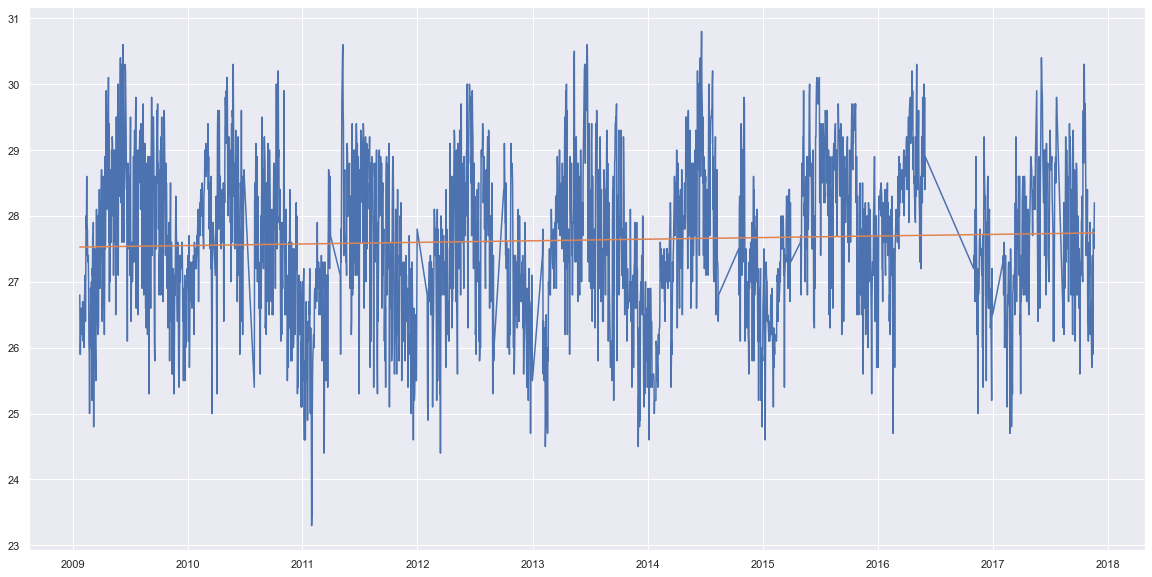

In [282]:
x_num = matplotlib.dates.date2num(df.index)
z = np.polyfit(x_num, df["mean_temperature"], 1)
p = np.poly1d(z)
plt.subplots(figsize=(20,10))
plt.plot(df['mean_temperature'])
plt.plot(x_num, p(x_num))